https://www.kaggle.com/nadintamer/titanic-survival-predictions-beginner

Gaussian Naive Bayes  
Logistic Regression  
Support Vector Machines  
Perceptron  
Decision Tree Classifier  
Random Forest Classifier  
KNN or k-Nearest Neighbors  
Stochastic Gradient Descent  
Gradient Boosting Classifier  

# 1) Libraries and Data

In [205]:
#data analysis libraries 
import numpy as np
import pandas as pd

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [206]:
import os
os.getcwd()

'C:\\Users\\KIM\\Desktop\\minz\\code'

In [207]:
import time

In [208]:
start = time.time()
train = pd.read_csv('../data/titanic/input/train.csv')
end = time.time()
print('read time: %.2f seconds' % (end-start))

test = pd.read_csv('../data/titanic/input/test.csv')

read time: 0.01 seconds


In [209]:
# train_old = pd.read_csv('../data/titanic/input/train.csv')
# test_old = pd.read_csv('../data/titanic/input/test.csv')

In [210]:
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
340,341,1,2,"Navratil, Master. Edmond Roger",male,2.0,1,1,230080,26.00,F2,S
401,402,0,3,"Adams, Mr. John",male,26.0,0,0,341826,8.05,NaN,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
637,638,0,2,"Collyer, Mr. Harvey",male,31.0,1,1,C.A. 31921,26.25,NaN,S


# 2) EDA

- 데이터 타입 확인
- 분포 확인
- 상관관계 확인
- 결측 확인
- 이상치 확인

In [211]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Greenberg, Mr. Samuel",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [212]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [213]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [214]:
# Numeric: Age, Fare, SibSp, Parch
# Categorical : Survived, Sex, Embarked, Pcalss
# Alphanumeric : Ticket, Cabin

In [215]:
train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [216]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 결측치 확인

In [217]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [218]:
train.isnull().sum() / train.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [219]:
# Cabin 버려

## 2.1) 가설

Sex: 여자 생존율 높을 듯  
SibSp/Parch: 혼자 온 사람이 더 생존율 높을 듯  
Age: 어릴 수록 생존율 높을 듯  
Pclass: 좌석이 좋을 수록 생존율 높을 듯

## 2.2) 시각화

## correlation

In [220]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [221]:
features = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked']

In [222]:
mask = np.zeros_like(train[features].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

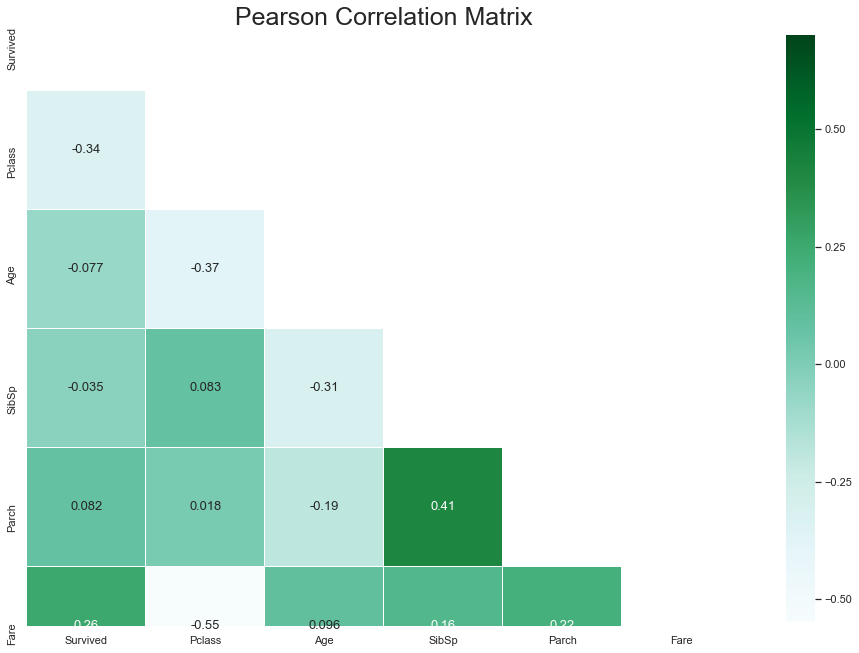

In [223]:
f, ax = plt.subplots(figsize=(16,12))
plt.title('Pearson Correlation Matrix', fontsize=25)
sns.heatmap(train[features].corr(), mask=mask,
           cbar_kws={'shrink':.9},
           cmap='BuGn',
           linecolor='w', linewidths=0.25, # 흰 선
           annot=True, annot_kws={'size':13}, # 칸 안에 숫자
           square=True, vmax=0.7)

## distribution

[None, None, None, None, None, None]

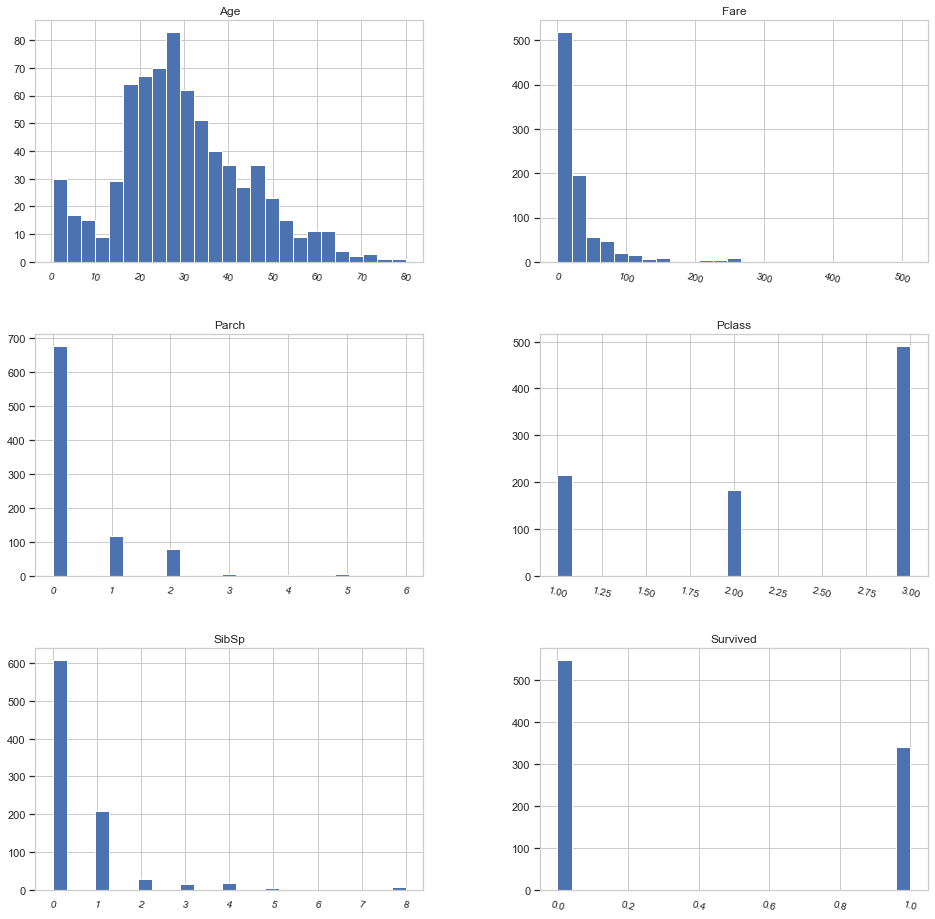

In [224]:
h = train[features].hist(bins=25, figsize=(16,16),
                        xlabelsize='10', xrot=-15)
# sns.despine(left=True, bottom=True)
[x.title.set_size(12) for x in h.ravel()] # x축 크기
[x.yaxis.tick_left() for x in h.ravel()]

## Outlier

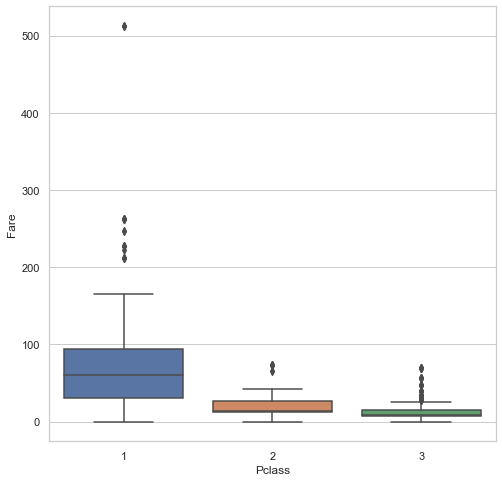

In [225]:
sns.set(style='whitegrid', font_scale=1)

f, axes = plt.subplots(1, 1, figsize=(8,8))
sns.boxplot(x=train['Pclass'], y=train['Fare'])
# sns.despine(left=True, bottom=True)

In [226]:
# f, axes = plt.subplots(1, 2, figsize=(15,5))
# sns.boxplot(x=df['bedrooms'], y=df['price'], ax=axes[0])
# sns.boxplot(x=df['floors'], y=df['price'], ax=axes[1])
# sns.despine(left=True, bottom=True)

# axes[0].set(xlabel='Bedrooms', ylabel='Price')
# axes[0].yaxis.tick_left()

# axes[1].set(xlabel='Floors', ylabel='Price')
# axes[1].yaxis.set_label_position('right')
# axes[1].yaxis.tick_right()

### bar plot - Sex

Percentage of "females" who survived: 74.20382165605095 %
Percentage of "males" who survived: 18.890814558058924 %


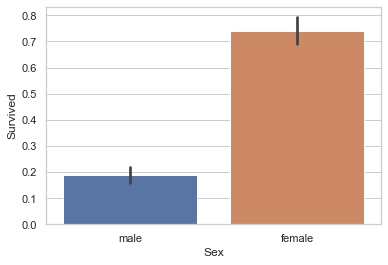

In [227]:
sns.barplot(x='Sex', y='Survived', data=train)
print('Percentage of "females" who survived:',train['Survived'][train['Sex']=='female'].value_counts(normalize=True)[1]*100,'%')
print('Percentage of "males" who survived:', train['Survived'][train['Sex']=='male'].value_counts(normalize=True)[1]*100, '%')

In [228]:
train['Survived'][train['Sex']=='female'].value_counts()

1    233
0     81
Name: Survived, dtype: int64

In [229]:
train['Survived'][train['Sex']=='female'].value_counts(normalize=True)

1    0.742038
0    0.257962
Name: Survived, dtype: float64

### bar plot - Pclass

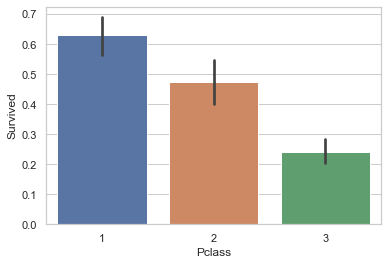

In [230]:
sns.barplot(x='Pclass', y='Survived', data= train)

In [231]:
#print percentage of people by Pclass that survived
print("Percentage of Pclass = 1 who survived:", train["Survived"][train["Pclass"] == 1].value_counts(normalize = True)[1]*100)
print("Percentage of Pclass = 2 who survived:", train["Survived"][train["Pclass"] == 2].value_counts(normalize = True)[1]*100)
print("Percentage of Pclass = 3 who survived:", train["Survived"][train["Pclass"] == 3].value_counts(normalize = True)[1]*100)

Percentage of Pclass = 1 who survived: 62.96296296296296
Percentage of Pclass = 2 who survived: 47.28260869565217
Percentage of Pclass = 3 who survived: 24.236252545824847


### bar plot - SibSp

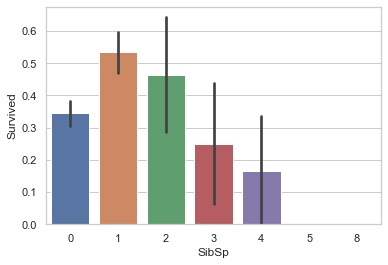

In [232]:
sns.barplot(x='SibSp', y='Survived', data=train)

In [233]:
#I won't be printing individual percent values for all of these.
print("Percentage of SibSp = 0 who survived:", train["Survived"][train["SibSp"] == 0].value_counts(normalize = True)[1]*100)
print("Percentage of SibSp = 1 who survived:", train["Survived"][train["SibSp"] == 1].value_counts(normalize = True)[1]*100)
print("Percentage of SibSp = 2 who survived:", train["Survived"][train["SibSp"] == 2].value_counts(normalize = True)[1]*100)

Percentage of SibSp = 0 who survived: 34.53947368421053
Percentage of SibSp = 1 who survived: 53.588516746411486
Percentage of SibSp = 2 who survived: 46.42857142857143


### bar plot - Parch Feature

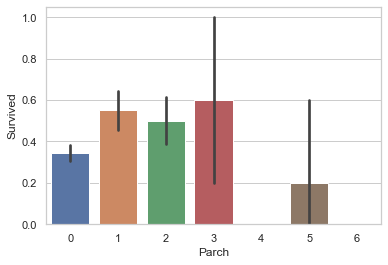

In [234]:
sns.barplot(x='Parch', y='Survived', data=train)

# 3) 결측치 처리

In [235]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Age

In [236]:
print('The percentage of null value in Age: %.2f' % \
     (train['Age'].isnull().sum() / train.shape[0] * 100), '%')

The percentage of null value in Age: 19.87 %


#### density plot - Age

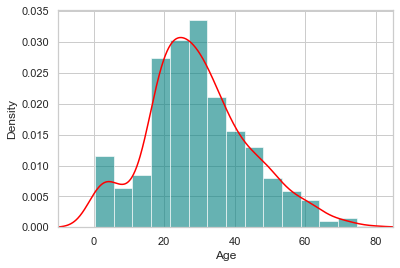

In [237]:
ax = train['Age'].hist(bins=15,
                      density=True,
                      stacked=True,
                      color='teal',
                      alpha=0.6)
# 선 부분
train['Age'].plot(kind='density', color='red')
ax.set(xlabel='Age')
plt.xlim(-10, 85)
plt.show()

left skewed -> mean imputation 부적절

In [238]:
print('the mean value of Age %.2f' % train['Age'].mean(skipna=True))
print('the median value of Age %.2f' % train['Age'].median(skipna=True))

the mean value of Age 29.70
the median value of Age 28.00


### Cabin

In [239]:
print('The percentage of null value in "Cabin": %.2f' % \
     (train['Cabin'].isnull().sum() / train.shape[0] * 100), '%')

The percentage of null value in "Cabin": 77.10 %


too many Na -> drop

In [240]:
train['Cabin'].value_counts()

C23 C25 C27    4
G6             4
B96 B98        4
D              3
E101           3
              ..
F38            1
C128           1
B4             1
C95            1
C110           1
Name: Cabin, Length: 147, dtype: int64

### Embarked

In [241]:
print('The percentage of null value in "Embarkation": %.2f' % \
     (train['Embarked'].isnull().sum() / train.shape[0] * 100), '%')

The percentage of null value in "Embarkation": 0.22 %


#### counts plot - Embarked

S    644
C    168
Q     77
Name: Embarked, dtype: int64


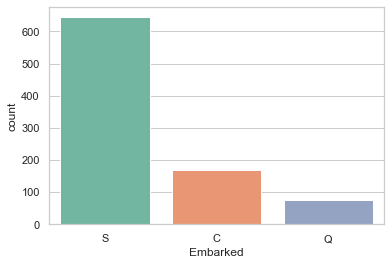

In [242]:
print(train['Embarked'].value_counts())
sns.countplot(x='Embarked',
             data=train,
             palette='Set2') # 색 부분
plt.show()

애매할 땐 most common value

## NA Imputation

In [243]:
# train_old = pd.read_csv('../data/titanic/input/train.csv')

In [244]:
train_old = train.copy() # to compare
# Age : median imputation
train['Age_1'] = train['Age']
train['Age_1'].fillna(train['Age_1'].median(skipna=True), inplace=True)
# Cabin : drop
train.drop(['Cabin'], axis=1, inplace=True)
# Embarked : the most common value ('S')
train['Embarked'].fillna(train['Embarked'].value_counts().idxmax(), inplace=True)

In [245]:
test_old = test.copy() # to compare
# Age : median imputation
test['Age_1'] = test['Age']
test['Age_1'].fillna(test['Age_1'].median(skipna=True), inplace=True)
# Cabin : drop
test.drop(['Cabin'], axis=1, inplace=True)
# Embarked : the most common value ('S')
test['Embarked'].fillna(test['Embarked'].value_counts().idxmax(), inplace=True)

In [246]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
Age_1            0
dtype: int64

#### 결측 전후 비교

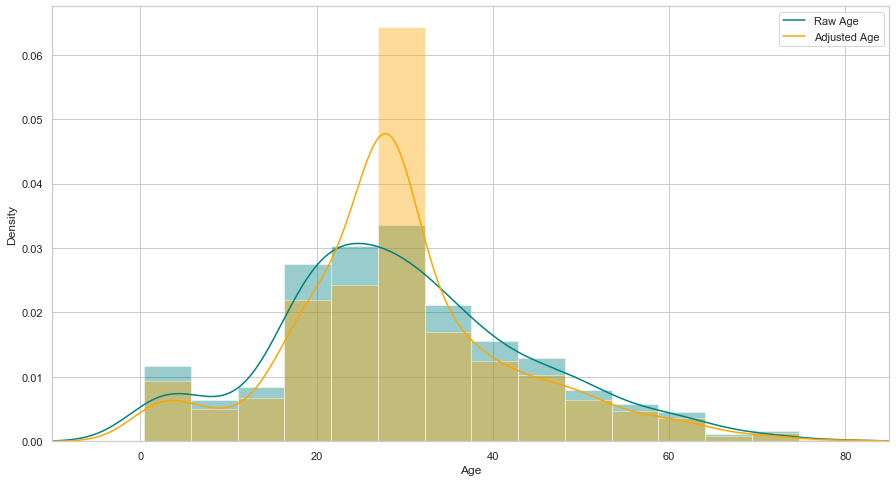

In [247]:
plt.figure(figsize=(15,8))
ax = train['Age'].hist(bins=15,
                      density=True,
                      stacked=True,
                      color='teal',
                      alpha=0.4)
train['Age'].plot(kind='density', color='teal')
ax = train['Age_1'].hist(bins=15,
                          density=True,
                          stacked=True,
                          color='orange',
                          alpha=0.4)
train['Age_1'].plot(kind='density', color='orange')

ax.legend(['Raw Age', 'Adjusted Age'])
ax.set(xlabel='Age')
plt.xlim(-10, 85)
plt.show()

# 4) Feature Engineering

### Age group

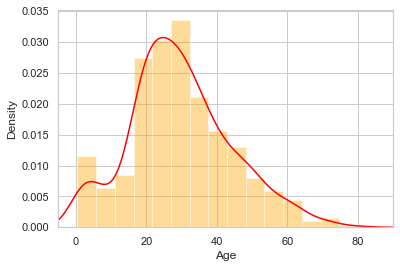

In [248]:
ax = train['Age'].hist(bins=15,
                      density=True,
                      stacked=True,
                      color='orange',
                      alpha=0.4)
train['Age'].plot(kind='density', color='red')
ax.set(xlabel='Age')
plt.xlim(-5, 90)
plt.show()

In [249]:
bins= [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels=['Unknown', 'Baby', 'Child', 'Teenager',
       'Student', 'Young Adult', 'Adult', 'Senior']

In [250]:
train['AgeGroup'] = pd.cut(train['Age'], bins, labels= labels)
test['AgeGroup'] = pd.cut(test['Age'], bins, labels= labels)

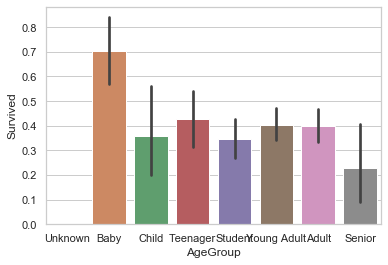

In [251]:
sns.barplot(x='AgeGroup', y='Survived', data=train)
plt.show()

### Cabin

In [252]:
cabin_tmp = train_old[['Cabin', 'Survived']]

In [253]:
cabin_tmp['CabinBool'] = (cabin_tmp['Cabin'].notnull().astype('int'))

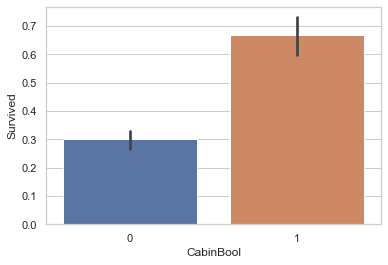

In [254]:
sns.barplot(x='CabinBool', y='Survived', data=cabin_tmp)
plt.show()

극명한 영향을 보이지도 않음

In [255]:
del cabin_tmp

## categorical - Pclass, Embarked, Sex

In [256]:
# train = pd.get_dummies(train, columns=['Pclass', 'Embarked','Sex'])
# test = pd.get_dummies(test, columns=['Pclass', 'Embarked','Sex'])

In [257]:
# drop_columns = ['Sex_female', 'PassengerId', 'Ticket']
# train.drop(drop_columns,
#           axis=1, inplace=True)
# test.drop(drop_columns,
#           axis=1, inplace=True)

In [258]:
# train.columns

In [259]:
# One-hot encoding

In [260]:
embarked_mapping = {'S':1, 'C':2, 'Q':3}

combine = [train, test]
for datasets in combine:
    datasets['Embarked'] = datasets['Embarked'].map(embarked_mapping)

In [261]:
Age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}

combine = [train, test]
for datasets in combine:
    datasets['AgeGroup'] = datasets['AgeGroup'].map(Age_mapping)

In [262]:
train['AgeGroup'].unique()

array([ 4.,  6.,  5., nan,  1.,  3.,  2.,  7.])

In [263]:
Sex_mapping = {'male':1, 'female':0}

combine = [train, test]
for datasets in combine:
    datasets['Sex'] = datasets['Sex'].map(Sex_mapping)

In [264]:
train.sample(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_1,AgeGroup
805,806,0,3,"Johansson, Mr. Karl Johan",1,31.0,0,0,347063,7.775,1,31.0,5.0
239,240,0,2,"Hunt, Mr. George Henry",1,33.0,0,0,SCO/W 1585,12.275,1,33.0,5.0


## 예측 대체 - Name & Age

In [265]:
combine = [train, test]

In [266]:
for dataset in combine:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.',
                                                   expand=False)

In [267]:
pd.crosstab(train['Title'], train['Sex'])

Sex,0,1
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [268]:
# 이름 치환
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Capt','Col',
        'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'],'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', "Miss")
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

In [269]:
pd.crosstab(train['Title'], train['Survived'])

Survived,0,1
Title,,
Master,17,23
Miss,55,130
Mr,436,81
Mrs,26,100
Rare,15,5
Royal,0,3


In [270]:
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.250000
5,Royal,1.000000


In [271]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train['Title_label'] = label_encoder.fit_transform(train['Title'])

In [272]:
### map each of the title groups to a numerical value

In [273]:
# title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}
# for dataset in combine:
#     dataset['Title'] = dataset['Title'].map(title_mapping)
#     dataset['Title'] = dataset['Title'].fillna(0)

# train.head()

In [274]:
train[['Title','Title_label']].drop_duplicates()

,Title,Title_label
0,Mr,2
1,Mrs,3
2,Miss,1
7,Master,0
30,Rare,4
556,Royal,5


# ★ Title 별 연령 평균값으로 결측값 타이틀에 매핑

In [275]:
age_mean = train[['Title', 'Age']].groupby(['Title']).mean().astype('int').reset_index()
# age_mean = train[['Title', 'Age']].groupby(['Title']).mean().reset_index()
# age_mean[['Age']] = age_mean[['Age']].astype('int64')
age_mean.rename(columns={'Age':'Age_mean'}, inplace=True)
age_mean = pd.DataFrame(age_mean)

In [276]:
train['Age_2'] = train['Age']

In [277]:
train[['Survived', 'Name','Title', 'Age','AgeGroup',
       'Age_1', 'Age_2']][train['Age_2'].isna()==True].head(3)

,Survived,Name,Title,Age,AgeGroup,Age_1,Age_2
5,0,"Moran, Mr. James",Mr,NaN,NaN,28.0,NaN
17,1,"Williams, Mr. Charles Eugene",Mr,NaN,NaN,28.0,NaN
19,1,"Masselmani, Mrs. Fatima",Mrs,NaN,NaN,28.0,NaN


In [278]:
train['Age_2'] = train['Age_2'].fillna(train['Title'].map(age_mean.set_index('Title')['Age_mean']))

### distribution

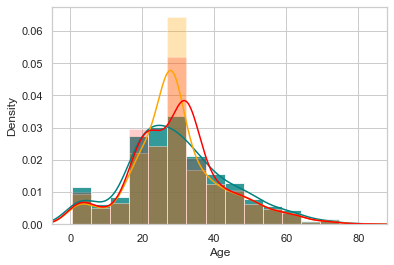

In [279]:
ax = train['Age'].hist(bins=15, density=True, stacked=True, color='teal',alpha=0.8)
ax = train['Age_1'].hist(bins=15, density=True, stacked=True, color='orange', alpha=0.3)
ax = train['Age_2'].hist(bins=15, density=True, stacked=True, color='red', alpha=0.2)

train['Age'].plot(kind='density', color='teal')
train['Age_1'].plot(kind='density', color='orange')
train['Age_2'].plot(kind='density', color='red')

ax.set(xlabel='Age')
plt.xlim(-5, 88)
plt.show()

In [280]:
# train['Age_2'] = train['Age_2'].fillna(train['Title'].map(age_mean.set_index('Title')['Age_mean']))
test['Age_2'] = test['Age']
test['Age_2'] = test['Age_2'].fillna(test['Title'].map(age_mean.set_index('Title')['Age_mean']))

In [281]:
del test['Age']
del train['Age']

In [282]:
del train['Title_label']

In [283]:
print(test.columns)
print(train.columns)

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked', 'Age_1', 'AgeGroup', 'Title', 'Age_2'],
      dtype='object')
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'Age_1', 'AgeGroup', 'Title', 'Age_2'],
      dtype='object')


In [284]:
del test['Name']
del train['Name']

In [285]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}

combine = [train, test]
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [286]:
del train['PassengerId']
del train['Ticket']

In [287]:
train.sample(2)

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age_1,AgeGroup,Title,Age_2
609,1,1,0,0,0,153.4625,1,40.0,6.0,2,40.0
243,0,3,1,0,0,7.1250,1,22.0,4.0,1,22.0


In [288]:
bins= [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels=['Unknown', 'Baby', 'Child', 'Teenager',
       'Student', 'Young Adult', 'Adult', 'Senior']

In [289]:
train['AgeGroup'] = pd.cut(train['Age_2'], bins, labels= labels)
test['AgeGroup'] = pd.cut(test['Age_2'], bins, labels= labels)

In [290]:
#map each Age value to a numerical value
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}
train['AgeGroup'] = train['AgeGroup'].map(age_mapping)
test['AgeGroup'] = test['AgeGroup'].map(age_mapping)

In [291]:
print(train.isnull().sum())
print(test.isnull().sum())

Survived    0
Pclass      0
Sex         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Age_1       0
AgeGroup    0
Title       0
Age_2       0
dtype: int64
PassengerId    0
Pclass         0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
Age_1          0
AgeGroup       0
Title          0
Age_2          0
dtype: int64


# 5) Feature Selection

In [292]:
print(train.columns)
print(test.columns)

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'Age_1', 'AgeGroup', 'Title', 'Age_2'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked', 'Age_1', 'AgeGroup', 'Title', 'Age_2'],
      dtype='object')


In [293]:
from sklearn.model_selection import train_test_split

predictors = train.drop(['Survived'], axis=1)
target = train['Survived']

x_train, x_val, y_train, y_val = train_test_split(predictors, target,
                                                 test_size=0.22,
                                                 random_state=0)

In [294]:
print(x_train.shape,
     y_train.shape,
     x_val.shape)

(694, 10) (694,) (197, 10)


In [295]:
train.columns.delete(0)

Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Age_1',
       'AgeGroup', 'Title', 'Age_2'],
      dtype='object')

In [296]:
from sklearn.feature_selection import RFE

cols = train.columns.delete(0)
x = train[cols]
y = train['Survived']

model = LogisticRegression()
# RFE 모델 :: 8개 속성
rfe = RFE(model, 8)
rfe = rfe.fit(x, y)
# 선정된 속성 요약
print('Selected Features: %s' % list(x.columns[rfe.support_]))

Selected Features: ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Age_1', 'Title', 'Age_2']


In [297]:
# RFE + CV : 최적 변수 수 찾아줘
from sklearn.feature_selection import RFECV

rfecv = RFECV(estimator=LogisticRegression(),
             step=1,
             cv=10,
             scoring='accuracy')
rfecv.fit(x,y)

print('Selected Features: %s' % list(x.columns[rfecv.support_]))

Selected Features: ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Age_1', 'Title', 'Age_2']


In [298]:
print("Optimal Number of features: %d" % rfecv.n_features_)

Optimal Number of features: 8


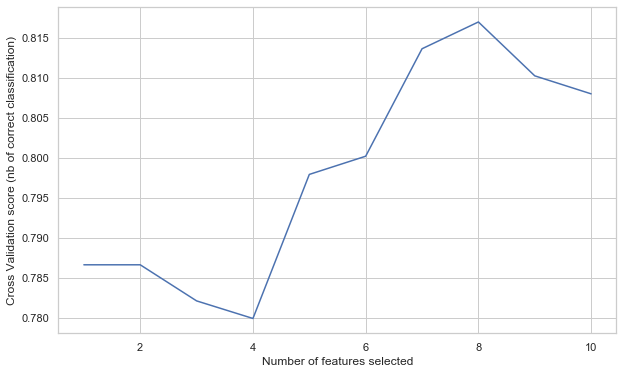

In [299]:
# Plot the number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross Validation score (nb of correct classification)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

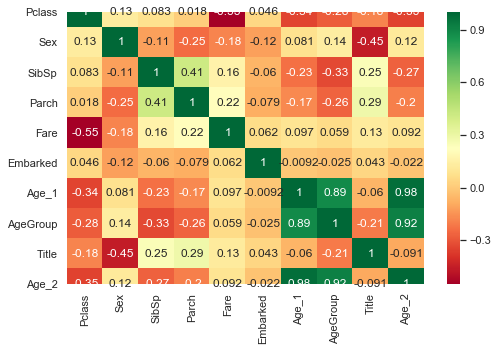

In [300]:
# 선택된 변수들간 상관관계
selected_features = x.columns[rfecv.support_]
temp = train[selected_features]

plt.subplots(figsize=(8,5))
sns.heatmap(x.corr(), annot=True, cmap='RdYlGn')
plt.show()

In [301]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_log = accuracy_score(y_val, y_pred)

logreg.fit(x_train[selected_features], y_train)
y_pred = logreg.predict(x_val[selected_features])
acc_log_selected = accuracy_score(y_val, y_pred)

print('non-selected features accuracy: %.5f' % acc_log,
     '\nSelected features accuracy: %.5f' % acc_log_selected)

non-selected features accuracy: 0.78680 
Selected features accuracy: 0.78680


정확도가 똑같을 때는 변수가 더 적은 모델로 선택

In [302]:
print(train.columns)
print(test.columns)

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'Age_1', 'AgeGroup', 'Title', 'Age_2'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked', 'Age_1', 'AgeGroup', 'Title', 'Age_2'],
      dtype='object')


In [304]:
selected_features

Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Age_1', 'Title',
       'Age_2'],
      dtype='object')

In [306]:
test = test[['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Age_1', 'Title',
       'Age_2','PassengerId']]
train = train[['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Age_1', 'Title',
       'Age_2','Survived']]

In [310]:
from IPython.display import display
display(test.sample(2))
display(train.sample(2))

,Pclass,Sex,SibSp,Parch,Embarked,Age_1,Title,Age_2,PassengerId
97,3,1,0,0,1,29.0,1,29.0,989
200,3,0,0,0,3,27.0,2,21.0,1092


,Pclass,Sex,SibSp,Parch,Embarked,Age_1,Title,Age_2,Survived
639,3,1,1,0,1,28.0,1,32.0,0
409,3,0,3,1,1,28.0,2,21.0,0


## 6) Modeling

### +) DATA set split

In [311]:
print(train.columns)
print(test.columns)

Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Age_1', 'Title',
       'Age_2', 'Survived'],
      dtype='object')
Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Age_1', 'Title',
       'Age_2', 'PassengerId'],
      dtype='object')


In [312]:
from sklearn.model_selection import train_test_split

predictors = train.drop(['Survived'], axis=1)
target = train['Survived']

x_train, x_val, y_train, y_val = train_test_split(predictors, target,
                                                 test_size=0.22,
                                                 random_state=0)

In [313]:
print(x_train.shape,
     y_train.shape,
     x_val.shape)

(694, 8) (694,) (197, 8)


### import Libraries

In [314]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [315]:
# model evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import log_loss

## 6-1) Logistic Regression

## -1) train-test split 기반 평가

In [316]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_val)

acc_log = accuracy_score(y_val, y_pred)
loss_log = log_loss(y_val, y_pred)
auc_log = metrics.roc_auc_score(y_val, y_pred)

In [317]:
print(acc_log,
     loss_log,
     auc_log)

0.7868020304568528 7.363694410784636 0.7799381352187361


## -2) K-fold cross validation 기반 평가

In [318]:
logreg = LogisticRegression()

x = train.drop(['Survived'], axis=1)
y = train['Survived']

scores_accuracy = cross_val_score(logreg, x, y, cv=10, scoring='accuracy')
scores_log_loss = cross_val_score(logreg, x, y, cv=10, scoring='neg_log_loss')
scores_auc = cross_val_score(logreg, x, y, cv=10, scoring='roc_auc')

acc_log = scores_accuracy.mean()
loss_log = -scores_log_loss.mean()
auc_log = scores_auc.mean()

In [319]:
print(acc_log,
     loss_log,
     auc_log)

0.8159002950856884 0.43813168003477143 0.8644934357581416


### Coefficient 확인가능

In [320]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg.coef_

array([[-0.9071381 , -1.91306831, -0.49246015, -0.11110773,  0.2477078 ,
         0.03351904,  0.59020806, -0.06726673]])

In [321]:
coeff_df = pd.DataFrame(train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df['Correlation'] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
6,Age_2,0.590208
4,Age_1,0.247708
5,Title,0.033519
7,Survived,-0.067267
3,Embarked,-0.111108
2,Parch,-0.492460
0,Sex,-0.907138
1,SibSp,-1.913068


성별, Title 이 Y값에 유의미한 영향  
(해석할 때 1이 뭔지, 0이 뭔지 파악 중요)

## 6-2) SVM

In [322]:
# Support Vector Machines

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)

acc_svc = round(svc.score(x_train, y_train) * 100, 2)
acc_svc

87.18

In [323]:
# https://tensorflow.blog/tag/cross_val_score/
# 교차 검증 방법
svc = SVC(probability=True)

# scoring = {'accuracy', 'neg_log_loss', 'roc_auc'} for evaluation metric - althought they are many
scores_accuracy = cross_val_score(svc, x, y, cv=10, scoring='accuracy')
scores_log_loss = cross_val_score(svc, x, y, cv=10, scoring='neg_log_loss')
scores_auc = cross_val_score(svc, x, y, cv=10, scoring='roc_auc')

acc_svm = scores_accuracy.mean()
loss_svm = -scores_log_loss.mean()
auc_svm = scores_auc.mean()

In [324]:
# sc = StandardScaler()
# sc.fit(x_train) # x_train의 평균과 표준편차 구함
# x_train_std = sc.transform(x_train)
# x_val_std = sc.transform(x_val)

## 6-2-2) SVM with rbf kernel

In [328]:
svc_rbf = SVC(kernel='rbf', C=10.0, gamma='auto', random_state=0) # gamma변경 가능
svc_rbf.fit(x_train, y_train)
y_pred = svc_rbf.predict(x_val)

acc_svc_rbf = round(svc_rbf.score(x_train, y_train) * 100, 2)
acc_svc_rbf

92.65

In [330]:
# https://tensorflow.blog/tag/cross_val_score/
# 교차 검증 방법
svc_rbf = SVC(kernel='rbf', C=10.0, gamma='auto', random_state=0,
             probability=True)

# scoring = {'accuracy', 'neg_log_loss', 'roc_auc'} for evaluation metric - althought they are many
scores_accuracy = cross_val_score(svc_rbf, x, y, cv=10, scoring='accuracy')
scores_log_loss = cross_val_score(svc_rbf, x, y, cv=10, scoring='neg_log_loss')
scores_auc = cross_val_score(svc_rbf, x, y, cv=10, scoring='roc_auc')

acc_svm_rbf = scores_accuracy.mean()
loss_svm_rbf = -scores_log_loss.mean()
auc_svm_rbf = scores_auc.mean()

## 6-3) KNN

In [331]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
acc_knn = round(knn.score(x_train, y_train)*100, 2)
acc_knn

82.71

In [332]:
# 교차 검증 방법
knn = KNeighborsClassifier(n_neighbors=3)

# scoring = {'accuracy', 'neg_log_loss', 'roc_auc'} for evaluation metric - althought they are many
scores_accuracy = cross_val_score(knn, x, y, cv=10, scoring='accuracy')
scores_log_loss = cross_val_score(knn, x, y, cv=10, scoring='neg_log_loss')
scores_auc = cross_val_score(knn, x, y, cv=10, scoring='roc_auc')

acc_svm_rbf = scores_accuracy.mean()
loss_svm_rbf = -scores_log_loss.mean()
auc_svm_rbf = scores_auc.mean()

## 6-4) Gaussian Naive Bayes

In [ ]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

## 6-5) Decision Tree

In [340]:
# from sklearn.model_selection import GridSearchCV

In [343]:
# Train_Test_split

In [345]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
y_val = decision_tree.predict(x_val)
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
acc_decision_tree

94.81

### GridSearchCV + DT

In [348]:
# Decision Tree

params = {
#     'n_estimators' : [100, 300, 500],
    'max_depth' : [2,4,6,8],
#     'min_sample_leaf' : [2,4,6],
#     'min_sample_split' : [2,4,6]
}

decision_tree = DecisionTreeClassifier(random_state=0)
grid_cv = GridSearchCV(decision_tree,
                      param_grid=params, cv=2)
grid_cv.fit(x_train, y_train)

print('최적 하이퍼 파라미터:', grid_cv.best_params_)
print('최고 예측 정확도:', grid_cv.best_score_)

최적 하이퍼 파라미터: {'max_depth': 8}
최고 예측 정확도: 0.7997118155619597


## 6-6) Random Forest

### GridSearchCV + Random Forest
hyper parameter 찾아줌

In [334]:
from sklearn.model_selection import GridSearchCV

In [339]:
params = {
    'n_estimators' : [100, 300, 500],
    'max_depth' : [2,4,6,8],
#     'min_sample_leaf' : [2,4,6],
#     'min_sample_split' : [2,4,6]
}

rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid= params, cv=2, n_jobs=-1)
grid_cv.fit(x_train, y_train)

print('최적 하이퍼 파라미터:', grid_cv.best_params_)
print('최고 예측 정확도:', grid_cv.best_score_)

최적 하이퍼 파라미터: {'max_depth': 6, 'n_estimators': 100}
최고 예측 정확도: 0.8227665706051873


In [352]:
params = {
    'n_estimators' : [100, 300, 500],
    'max_depth' : [2,4,6,8],
#     'min_sample_leaf' : [2,4,6],
#     'min_sample_split' : [2,4,6]
}

rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid= params, cv=2, n_jobs=-1)
grid_cv.fit(x_train, y_train)

print('최적 하이퍼 파라미터:', grid_cv.best_params_)
print('최고 예측 정확도:', grid_cv.best_score_)

최적 하이퍼 파라미터: {'max_depth': 6, 'n_estimators': 100}
최고 예측 정확도: 0.8227665706051873


In [355]:
params = {
    'n_estimators' : [100, 300, 500],
    'max_depth' : [2,4,6,8],
#     'min_sample_leaf' : [2,4,6],
#     'min_sample_split' : [2,4,6]
}

scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}

rf_clf = RandomForestClassifier(random_state=0)
grid_cv = GridSearchCV(rf_clf,
                       param_grid= params,
                       scoring=scoring,
                       cv=2, n_jobs=2, 
                       refit='Accuracy') # 여러개 일 경우 1개 지정 
grid_cv.fit(x_train, y_train)

results = grid_cv.cv_results_

print('최적 하이퍼 파라미터:', grid_cv.best_params_)
print('최고 예측 정확도:', grid_cv.best_score_)

최적 하이퍼 파라미터: {'max_depth': 6, 'n_estimators': 100}
최고 예측 정확도: 0.8227665706051873


In [359]:
np.transpose(pd.DataFrame(grid_cv.cv_results_))

,0,1,2,3,4,5,6,7,8,9,10,11
mean_fit_time,0.089,0.261,0.358,0.0745,0.262,0.4035,0.089,0.5255,0.4285,0.086,0.2605,0.44
std_fit_time,0.000999928,0.0139999,0.0140001,0.000499845,1.19209e-07,0.00150013,0.00200009,0.0295,0.0145,0.00300002,0.00349998,0.00300002
mean_score_time,0.0404999,0.0955,0.1175,0.0285001,0.0850002,0.1475,0.0585001,0.1925,0.1505,0.0310001,0.0880001,0.1635
std_score_time,0.000499964,0.000499964,0.000499964,0.000499964,0.00100005,0.00149989,0.000499964,0.00449991,0.000499845,0,0.000999928,0.000500083
param_max_depth,2,2,2,4,4,4,6,6,6,8,8,8
param_n_estimators,100,300,500,100,300,500,100,300,500,100,300,500
params,"{'max_depth': 2, 'n_estimators': 100}","{'max_depth': 2, 'n_estimators': 300}","{'max_depth': 2, 'n_estimators': 500}","{'max_depth': 4, 'n_estimators': 100}","{'max_depth': 4, 'n_estimators': 300}","{'max_depth': 4, 'n_estimators': 500}","{'max_depth': 6, 'n_estimators': 100}","{'max_depth': 6, 'n_estimators': 300}","{'max_depth': 6, 'n_estimators': 500}","{'max_depth': 8, 'n_estimators': 100}","{'max_depth': 8, 'n_estimators': 300}","{'max_depth': 8, 'n_estimators': 500}"
split0_test_Accuracy,0.787356,0.781609,0.784483,0.798851,0.793103,0.798851,0.816092,0.816092,0.813218,0.807471,0.804598,0.804598
split1_test_Accuracy,0.82948,0.83237,0.82948,0.820809,0.823699,0.82659,0.82948,0.82659,0.823699,0.812139,0.817919,0.823699
mean_test_Accuracy,0.808357,0.806916,0.806916,0.809798,0.808357,0.81268,0.822767,0.821326,0.818444,0.809798,0.811239,0.814121


In [363]:
grid_cv.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_n_estimators', 'params', 'split0_test_Accuracy', 'split1_test_Accuracy', 'mean_test_Accuracy', 'std_test_Accuracy', 'rank_test_Accuracy', 'split0_test_AUC', 'split1_test_AUC', 'mean_test_AUC', 'std_test_AUC', 'rank_test_AUC', 'split0_test_Log_loss', 'split1_test_Log_loss', 'mean_test_Log_loss', 'std_test_Log_loss', 'rank_test_Log_loss'])

In [367]:
np.mean(grid_cv.cv_results_['mean_test_Accuracy'])

0.8125600384245916

In [369]:
-np.mean(grid_cv.cv_results_['mean_test_Log_loss'])

0.46487949271302864

In [370]:
np.mean(grid_cv.cv_results_['mean_test_AUC'])

0.8489395724619636

In [339]:
params = {
    'n_estimators' : [100, 300, 500],
    'max_depth' : [2,4,6,8],
#     'min_sample_leaf' : [2,4,6],
#     'min_sample_split' : [2,4,6]
}

rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid= params, cv=2, n_jobs=-1)
grid_cv.fit(x_train, y_train)

print('최적 하이퍼 파라미터:', grid_cv.best_params_)
print('최고 예측 정확도:', grid_cv.best_score_)

최적 하이퍼 파라미터: {'max_depth': 6, 'n_estimators': 100}
최고 예측 정확도: 0.8227665706051873


In [ ]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

In [362]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

ValueError: could not convert string to float: 'Accuracy'

In [ ]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
# submission.to_csv('../output/submission.csv', index=False)